In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

for i in [pd, np, mpl, sns]:
    print(i.__name__, i.__version__)

pandas 0.25.1
numpy 1.18.5
matplotlib 3.5.3
seaborn 0.12.2


# 1-3 데이터 변환

## 0. 데이터셋 소개

### Titanic Dataset

|Data|Dictionary|Description|
|:----|:----------|:---|
|PassengerId|Passenger Id|Index|
|Survived|Survival|0 = No, 1 = Yes|
|Pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|Name|Name|
|Sex|Sex|
|Age|Age in years|
|Sibsp|# of siblings / spouses aboard the Titanic|
|Parch|# of parents / children aboard the Titanic|	
|Ticket|Ticket number|
|Fare|Passenger fare|
|Cabin|Cabin number|
|Embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

In [2]:
df_titanic = pd.read_csv('data/titanic.csv', index_col='PassengerId')
df_titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S



## 1. 수치형 데이터

### 정규화(Normalize)

변수의 최소값을 0, 최대값이 1이 되도록 변환합니다.

> $X_{new} = \frac{X - min(X)}{max(X) - min(X)}$

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

**sklearn.preprocessing.MinMaxScaler**
    
</div>

**[Ex.1]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_titanic에서 Age와 Fare의 최소값은 0, 최대값이 1이 되도록 변환합니다. 

그리고 변환된 값을 변수명 뒤에 '_n'을 붙여 Age_n, Fare_n으로 저장합니다.
    
</div>

In [3]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

# 정규화 대상 컬럼입니다.
mm_cols = ['Age', 'Fare']
# 정규화 변환기를 학습합니다.
mm_scaler.fit(df_titanic[mm_cols])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [4]:
mm_cols_n = [i + '_n' for i in mm_cols]
# 복수의 numpy array를 DataFrame에 추가하려면, DataFrame 형태로 되어 있어야 합니다.
# DataFrame을 통해 추가시, 대상 Frame의 index로 인덱스를 구성합니다.
df_titanic[mm_cols_n] = \
    pd.DataFrame(mm_scaler.transform(df_titanic[mm_cols]), index=df_titanic.index)
df_titanic[mm_cols_n].head()

,Age_n,Fare_n
PassengerId,,
1,0.271174,0.014151
2,0.472229,0.139136
3,0.321438,0.015469
4,0.434531,0.103644
5,0.434531,0.015713


In [5]:
# 정규화 처리 후의 결과를 확인해봅니다.
df_titanic[mm_cols_n].agg(['min', 'max'])

,Age_n,Fare_n
min,0.0,0.0
max,1.0,1.0


**[Ex.2]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_titanic에서 Age와 Fare의 최소값은 -1, 최대값이 1이 되도록 변환합니다. 

그리고 변환된 값을 변수명 뒤에 '_n'을 붙여 Age_n, Fare_n으로 저장합니다.

</div>

In [6]:
# MinMaxScaler의 매개변수로 최소값과 최대값을 지정할 수 있습니다.

mm_scaler = MinMaxScaler((-1, 1))

# 정규화 변환기를 학습후 바로 변환값을 뽑아냅니다.
# 그리고 컬럼을 추가합니다.
mm_scaler.fit_transform(df_titanic[mm_cols])
df_titanic[mm_cols_n] = \
    pd.DataFrame(mm_scaler.transform(df_titanic[mm_cols]), index=df_titanic.index)
df_titanic[mm_cols_n].agg(['min', 'max'])

,Age_n,Fare_n
min,-1.0,-1.0
max,1.0,1.0


### 표준화(Standardize)

- 변수의 평균이 0, 표준편차가 1이 되도록 변환합니다.

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

**sklearn.preprocessing.StandardScaler**

**scipy.stats.zscore**

</div>

※ Remark: sklearn.preprocessing.StandardScaler 는 편향(biased) 표준편차를 사용합니다.

skelarn.preprocessing.StandardScaler 가이드에서 발췌한 내용
```
We use a biased estimator for the standard deviation, equivalent to
`numpy.std(x, ddof=0)`. Note that the choice of `ddof` is unlikely to
affect model performance.
```



**[Ex.3]**
<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">
sklearn.preprocessing.StandardScaler를 통해 df_titanic에서 Age와 Fare를 표준화합니다.


그리고 변환된 값을 변수명 뒤에 '_s'을 붙여 Age_s, Fare_s으로 저장합니다.
</div>

In [7]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_cols = ['Age', 'Fare']
std_cols_s = [i + '_s' for i in std_cols]
df_titanic[std_cols_s] = \
    pd.DataFrame(std_scaler.fit_transform(df_titanic[std_cols]), index=df_titanic.index)
pd.concat([
    df_titanic[std_cols_s].mean().rename('mean'), 
    df_titanic[std_cols_s].std(ddof=0).rename('std')
], axis=1)

,mean,std
Age_s,2.174187e-16,1.0
Fare_s,-4.373606e-17,1.0


- scipy.stats.zscore는 ddof를 통해 편향(biased, 모) 불편향(unbiased, 표본) 표준편차를 적용할지를 정할 수 있습니다.

**[Ex.4]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">
Fare를 표준화합니다. 표준화시 불편향(unbiased) 표준편차를 사용합니다. 변환된 값은 Fare_s2에 저장합니다.
</div>

In [8]:
from scipy.stats import zscore

df_titanic['Fare_s2'] = zscore(df_titanic['Fare'], ddof=1)
df_titanic['Fare_s2'].agg(['mean', 'std'])

mean   -1.196200e-17
std     1.000000e+00
Name: Fare_s2, dtype: float64

**정규화와 표준화의 효과**

* 회귀 분석시 정규화와 표준화를 통해 변수의 스케일을 균일화하여, 독립변수가 종속변수에 미치는 정도를 파악하기 쉽게 합니다.


* Ridge와 Lasso와 같은 모수의 크기에 대해 제약을 가하는 모델에서 규제가 균일하게 적용되도록 합니다.


* Gradient Descent와 같은 공간 탐색 기반의 알고리즘에서 학습률과 변수들간의 영향이 균일하도록 합니다.


### 거듭제곱 변환(Power Transformation)

- 변수의 분포를 우측 또는 좌측으로 치우친 정도를 조정합니다.


- 거듭수를 나타내는 파라메터 $\lambda$에 따라 변환함수가 달라집니다.

|$$\lambda$$|거듭 제곱 함수|
|-----|------|
|$$\lambda \ne 0$$|$$X_{new} = X^{\lambda}$$|
|$$\lambda = 0$$|$$X_{new} = log(X)$$|

- 변환 효과

|$$\lambda$$|효과|
|------:|:-----|
|$$\lambda = 0$$(log 변환)|우측 꼬리의 길이를 줄여, 우측으로 치우치게 분포하도록 변환합니다.|
|$$\lambda > 1$$|우측 꼬리의 길이를 늘립니다. $\lambda$가 커질수록 우측 꼬리의 길이가 커집니다.|
|$$0 < \lambda < 1$$|우측 꼬리의 길이를 줄여서 우측으로 치우친 형태의 분포로 변환 됩니다.|
|$$\lambda < 0$$|역수로 변환 됩니다.|

**[Ex.5]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_titanic λ=[-2, -1, -0.5, 0, 1, 2]에 따라 Power Transform된 Fare의 분포를 히스토그램으로 출력해봅니다.
    
</div>

In [9]:
# Fare의 기술 통계를 봅니다.
df_titanic['Fare'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


※ Remark 

<div style="border: 1px solid #ddd; padding: 10px;">

$\lambda$가 0인 경우 log변환을 하게되는데 Fare의 최소값이 0이므로,

Fare가 0인 경우가 존재합니다. 이 때 log 변환은 성립하지 않게 됩니다.

이 때, log의 값이 미지수가 되어 버립니다. 

이럴 경우 임의의 수를 더하여 0을 log로 취하는 것을 방지합니다.

변환 후 최소값이 0이 되도록 $log(X + 1)$로 변환합니다.
    
</div>

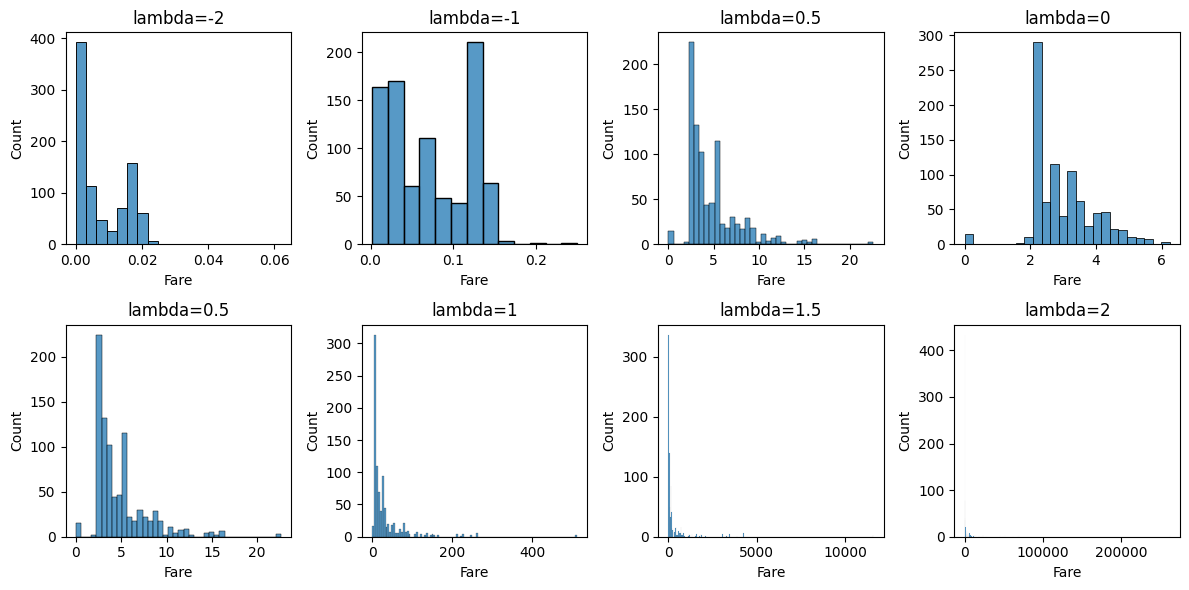

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
lams = [-2, -1, 0.5, 0, 0.5, 1, 1.5, 2]
for lam, ax in zip(lams, axes.ravel()):
    if lam != 0:
        sns.histplot(df_titanic['Fare'] ** lam, ax=ax)
    else:
        sns.histplot(np.log(df_titanic['Fare'] + 1), ax=ax)
    ax.set_title('lambda={}'.format(lam))
plt.tight_layout()
plt.show()

**[Ex.6]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">
    
df_titanic λ=[-2, -1, -0.5, 0, 1, 2]에 따라 Power Transform된 Age의 분포를 히스토그램으로 출력해봅니다.
    
이 때 Age의 결측치는 제외합니다.
    
</div>

In [11]:
# Fare의 기술 통계를 봅니다.
df_titanic['Age'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0


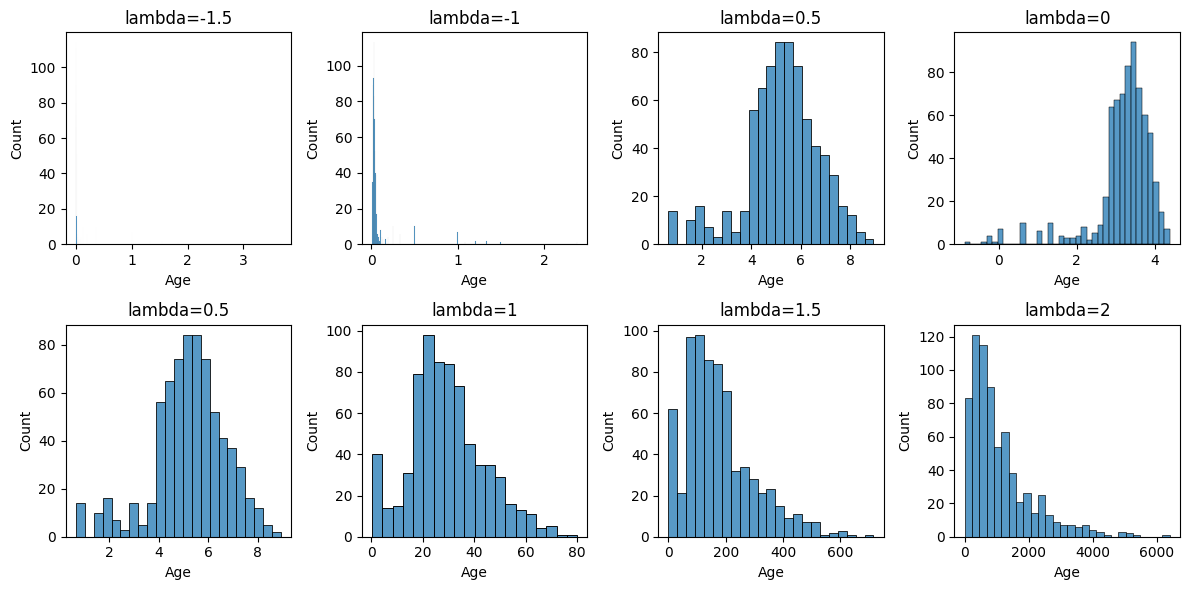

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
lams = [-1.5, -1, 0.5, 0, 0.5, 1, 1.5, 2]
s_age = df_titanic.loc[df_titanic['Age'].notna(), 'Age']
for lam, ax in zip(lams, axes.ravel()):
    if lam != 0:
        sns.histplot(s_age ** lam, ax=ax)
    else:
        sns.histplot(np.log(s_age), ax=ax)
    ax.set_title('lambda={}'.format(lam))
plt.tight_layout()
plt.show()

### Box-Cox 변환(Box-Cox Transformation)

- Power Transformation을 기반으로한 변환으로 정규 분포에 가까운 형태(정규 분포를 따르게 되는 것은 보장하지 않습니다.)로 변환합니다.


- $\lambda$에 따라 변환함수가 달라집니다. 데이터에서 정규분포와 가깝게 해주는 \lambda를 찾아줍니다

|$$\lambda$$|거듭 제곱 함수|
|-----|------|
|$$\lambda \ne 0$$|$$X^{(\lambda)} = \frac{X^{\lambda} - 1}{\lambda}$$|
|$$\lambda = 0$$|$$X_{new} = log(X)$$|

- $\lambda$는 아래의 손실 함수를 사용하여 구해집니다.

> $l(\lambda) = -\frac{n}{2}ln\left( \frac{1}{n}\sum_{j=1}^n\left( x_j^{(\lambda)} - \bar{x_j}^{(\lambda)}\right)^2 \right) + (\lambda - 1)\sum_{j=1}^nx_j$

손실 함수를 최소화하는 lambda를 구하여 변환 합니다. 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

**sklearn.preprocessing.PowerTransform, method='box-cox'**
    
</div>

**[Ex.7]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_titanic λ=[-2, -1, -0.5, 0, 1, 2]에 따라 Power Transform된 Age의 분포를 히스토그램으로 출력해봅니다. 이 때 Age의 결측치는 제외합니다.

여기에 box-cox Transformation의 결과까지 추가합니다.
    
</div>

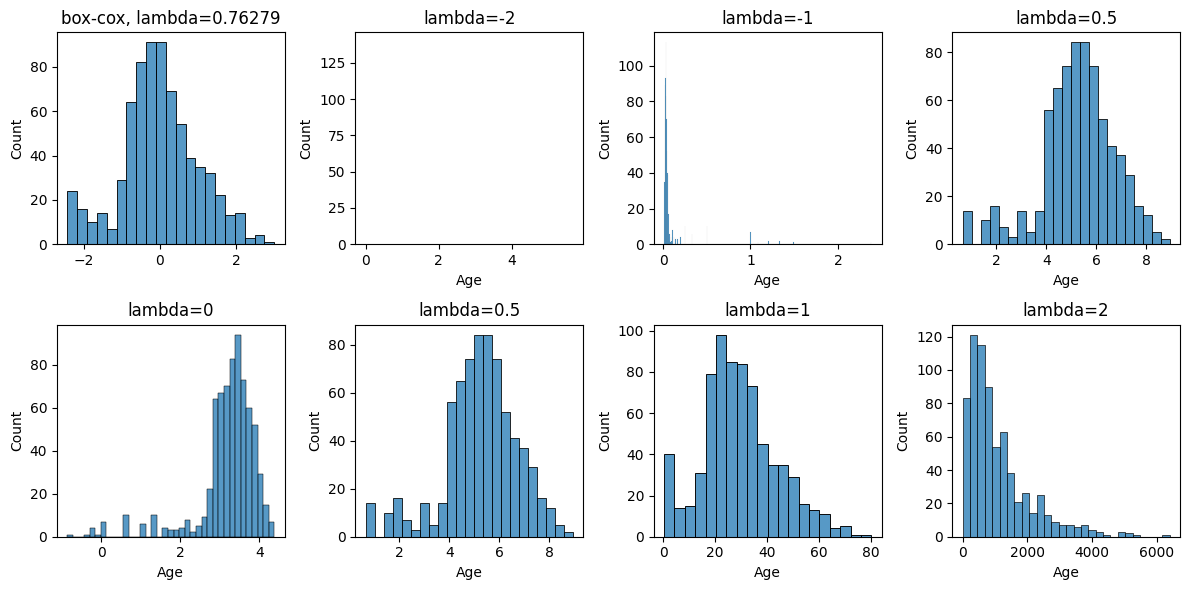

In [13]:
from sklearn.preprocessing import PowerTransformer
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
lams = ['box-cox', -2, -1, 0.5, 0, 0.5, 1, 2]
pt = PowerTransformer(method='box-cox')
for lam, ax in zip(lams, axes.ravel()):
    if lam =='box-cox':
        sns.histplot(pt.fit_transform(s_age.to_frame())[:, 0], ax=ax)
        ax.set_title('box-cox, lambda={:.5}'.format(pt.lambdas_[0]))
    elif lam != 0:
        sns.histplot(s_age ** lam, ax=ax)
        ax.set_title('lambda={}'.format(lam))
    else:
        sns.histplot(np.log(s_age), ax=ax)
        ax.set_title('lambda={}'.format(lam))
plt.tight_layout()
plt.show()

## 2. 범주형 데이터

### 가변수화(One-Hot Encoding, 지시변수화)

범주형 변수를 모델에 포함시키기 위해, 각 수준(범주)마다 범주에 해당 여부를 나타내는 하나의 이진 변수를 할당시킵니다.

예를들어, apple, banana, peach 범주들로 구성된 변수 **fruit**을 가변수해봅니다.

<table><tr><td>

|fruit|
|-----|
|apple|
|banana|
|peach|
|...|
|apple|

</td><td>

▷

</td><td>

|fruit_apple|fruit_banana|fruit_peach|
|----|----|----|
|1|0|0|
|0|1|0|
|0|0|1|
|.....|
|1|0|0|

</td></tr></table>
    
**sklearn.preprocessing.OneHotEncoder, pd.get_dummies**

**[Ex.8]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_titanic에서 Pclass와 Embarked를 가변수화 합니다.

Embarked의 결측은 최빈값으로 대체합니다.

가변수화한 후 새로운 데이터프레임 을 만듭니다.
    
</div>

In [14]:
df_titanic['Embarked'] = df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode().iloc[0])

**pd.get_dummies**로 해봅니다. 새로운 데이터프레임을 df_titanic_gd로 합니다.

In [15]:
# pd.get_dummies columns 파라메터에 가변수화를 할 컬럼들의 리스트를 전달합니다.
df_titanic_gd = pd.get_dummies(df_titanic, columns=['Pclass', 'Embarked'])
df_titanic_gd.head()

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_n,Fare_n,Age_s,Fare_s,Fare_s2,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,-0.457653,-0.971698,-0.530377,-0.502445,-0.502163,0,0,1,0,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,-0.055542,-0.721729,0.571831,0.786845,0.786404,1,0,0,1,0,0
3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,-0.357125,-0.969063,-0.254825,-0.488854,-0.488580,0,0,1,0,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,-0.130937,-0.792711,0.365167,0.420730,0.420494,1,0,0,0,0,1
5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,-0.130937,-0.968575,0.365167,-0.486337,-0.486064,0,0,1,0,0,1


**sklearn.preprocessing.OneHotEncoder**로 해봅니다. 새로운 데이터프레임을 df_titanic_ohe로 합니다.

In [16]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(
    sparse=False # pd.DataFrame에 넣기 위해 Dense Matrix 형태로 변환시킵니다.
)
ohe_cols = ['Pclass', 'Embarked']
ohe.fit(df_titanic[ohe_cols])

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=False)

In [17]:
# 가변수 변환을 해봅니다.
ohe.transform(df_titanic[ohe_cols])

array([[0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0.]])

In [18]:
# 가변수들의 명칭을 얻어옵니다.
ohe.get_feature_names(ohe_cols)

array(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'], dtype=object)

In [19]:
df_titanic_ohe = pd.concat([
    df_titanic.drop(columns=['Pclass', 'Embarked']), # Pclass와 Embaked를 제외합니다 - 제외 안해도 상관 없습니다. get_dummies와 동일한 결과를 유도하기 위함입니다.
    pd.DataFrame(ohe.transform(df_titanic[ohe_cols]), 
             index=df_titanic.index, 
             columns=ohe.get_feature_names(ohe_cols))
], axis=1)
df_titanic_ohe.head()

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_n,Fare_n,Age_s,Fare_s,Fare_s2,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,-0.457653,-0.971698,-0.530377,-0.502445,-0.502163,0.0,0.0,1.0,0.0,0.0,1.0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,-0.055542,-0.721729,0.571831,0.786845,0.786404,1.0,0.0,0.0,1.0,0.0,0.0
3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,-0.357125,-0.969063,-0.254825,-0.488854,-0.488580,0.0,0.0,1.0,0.0,0.0,1.0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,-0.130937,-0.792711,0.365167,0.420730,0.420494,1.0,0.0,0.0,0.0,0.0,1.0
5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,-0.130937,-0.968575,0.365167,-0.486337,-0.486064,0.0,0.0,1.0,0.0,0.0,1.0


In [20]:
# 동일 여부를 확인해 봅니다.
# 결측치인 경우는 동일 유무가 비교가 되지 않으므로 제외합니다.
(df_titanic_gd.dropna() != df_titanic_ohe.dropna()).sum()

Survived      0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Age_n         0
Fare_n        0
Age_s         0
Fare_s        0
Fare_s2       0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

### 레이블 인코딩(Label Encoding)

범주형 변수들의 범주마다 고유의 숫자로 치환하는 처리법입니다. 

**sklearn.preprocessing.LabelEncoder**

예를들어, apple, banana, peach 범주들로 구성된 범주형 변수 fruit를, 레이블 인코딩해봅니다.


<table><tr><td>

|fruit|
|-----|
|apple|
|banana|
|peach|
|...|
|apple|

</td><td>
    

▷ <br/>
    
apple→0, banana→1, peach→2

</td><td>
    
|fruit_l|
|----|
|0|
|1|
|2|
|.....|
|0|

</td></tr></table>

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

**sklearn.preprocessing.LabelEncoder**
    
</div>

**[Ex.9]** 

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_titanic의 Embaked를 LabelEncoding을 해봅니다.

Embarked의 결측은 최빈값으로 대체합니다.
    
</div>

In [21]:
df_titanic['Embarked'] = df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode().iloc[0])

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# 보통 transformer는 복수의 변수를 입력을 받습니다.
# 하지만, LabelEncoder는 단일 변수를 받습니다. 
# 이 점에서 LabelEncoder의 목적이 주로 수치형 대상값을 요구하는 모델을 위해 설계됐음을 알수 있습니다.
le.fit(df_titanic['Embarked']) 
le.transform(df_titanic['Embarked'])

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1,

In [23]:
le.classes_

array(['C', 'Q', 'S'], dtype=object)